# Pairs trading. Pairs selection. Cointegration (part 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Cointegration example

In [2]:
# generate random walk process
np.random.seed(112)
F = [15]
for i in range(252):
    F.append(F[i] + np.random.randn())
F = np.array(F)

# generate price series
P_a = 1.5*F + np.random.randn(len(F))
P_b = 0.5*F + np.random.randn(len(F))

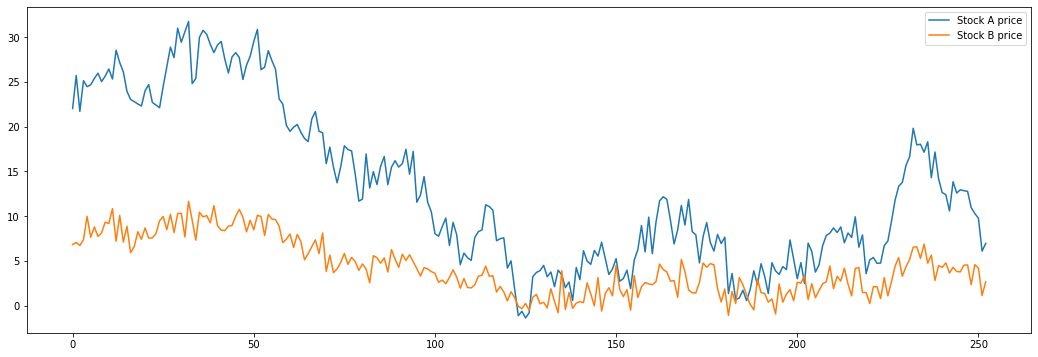

In [3]:
# plot prices
plt.figure(figsize=(18,6))
plt.plot(P_a, label='Stock A price')
plt.plot(P_b, label='Stock B price')
plt.legend()

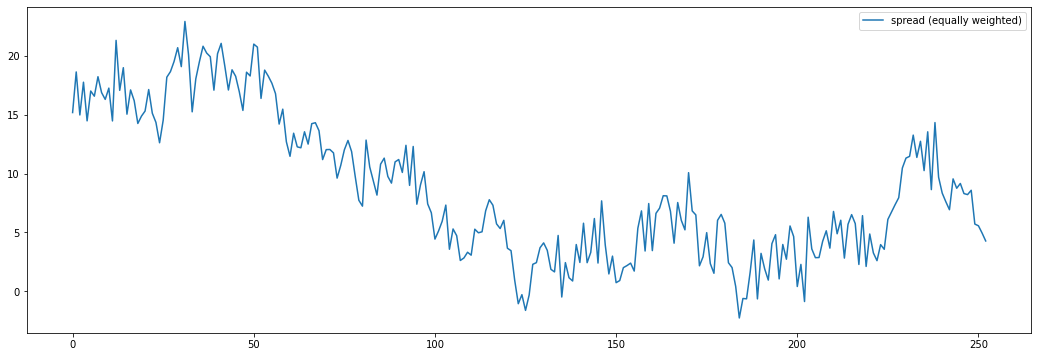

In [4]:
# plot spread (equally weighted positions)
spread_ew = P_a - P_b
plt.figure(figsize=(18,6))
plt.plot(spread_ew, label='spread (equally weighted)')
plt.legend()

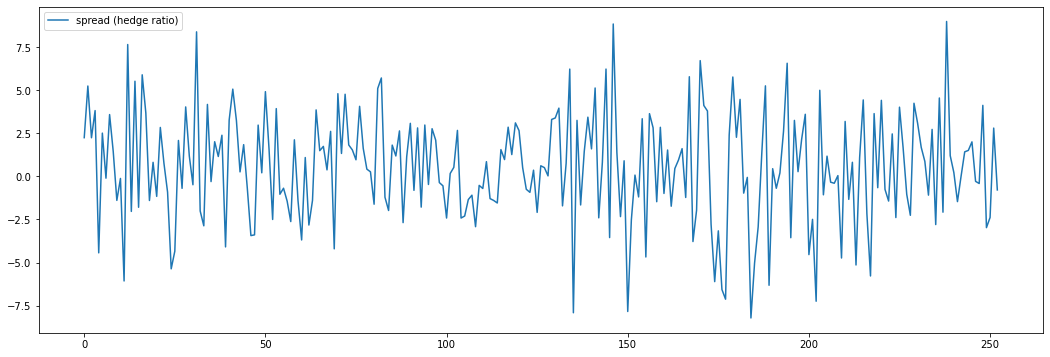

In [5]:
from statsmodels.regression.linear_model import OLS

# calculate hedge ratio
res = OLS(P_a, P_b).fit()
hedge_ratio = res.params[0]

# create portfolio using calculated ratio
spread_hr = P_a - hedge_ratio*P_b

plt.figure(figsize=(18,6))
plt.plot(spread_hr, label='spread (hedge ratio)')
plt.legend()

In [6]:
from statsmodels.tsa.stattools import coint

coint(P_a, P_b)

(-5.995727015051173,
 1.658313767794149e-06,
 array([-3.94042787, -3.36048387, -3.06132299]))

# Load data

In [7]:
# read prices from csv file
prices = pd.read_csv('vbr16_19.csv', index_col='Date')

In [8]:
prices

,IEX,NUAN,MOH,NVAX,SBNY,PWR,WSM,FANG,BRO,STLD,...,RES,LE,APEI,FF,WK,PKI,ALGT,SAGE,OII,DRQ
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,76.976616,13.567100,49.830002,149.800003,116.435783,22.887882,45.972996,85.069756,17.572161,21.910513,...,14.904593,16.760000,28.219999,5.362969,13.470000,51.718643,138.262650,31.100000,29.461021,59.099998
2016-07-05,75.590309,13.134199,48.240002,144.600006,113.829865,22.759472,44.250740,84.120781,17.387442,21.884090,...,14.506883,16.330000,26.690001,5.353037,13.450000,51.119549,134.303772,31.280001,28.251621,56.540001
2016-07-06,76.311562,13.151515,48.669998,149.199997,115.586044,23.174353,44.882534,85.032166,17.486902,22.482931,...,14.459538,16.100000,27.570000,5.372900,13.400000,51.512394,135.205246,32.320000,28.464476,56.830002
2016-07-07,76.798637,13.376623,48.959999,149.199997,117.115601,23.371920,44.666168,83.237549,17.425331,22.755930,...,14.345906,16.170000,27.799999,5.333174,13.560000,51.649891,135.381775,32.160000,28.396748,56.889999
2016-07-08,78.540871,13.722944,50.209999,152.399994,119.003944,24.063398,46.855759,83.773125,17.685837,23.460453,...,14.648921,16.700001,28.629999,5.556631,13.860000,52.985580,137.705048,33.970001,28.812782,57.150002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,170.038528,18.010000,136.649994,4.000000,131.962463,40.950520,70.886360,84.531479,38.795483,32.447666,...,5.050000,17.809999,27.330000,7.557316,41.470001,96.798271,179.097549,74.639999,15.090000,47.389999
2019-12-24,168.596710,18.000000,136.240005,4.000000,132.428436,40.712379,70.472260,85.623375,38.637653,32.664612,...,5.030000,17.580000,27.430000,7.600537,42.009998,97.037254,179.187057,76.800003,15.140000,47.410000
2019-12-26,169.420593,18.049999,136.380005,4.000000,133.185608,40.920746,71.271553,86.696274,38.834934,32.721199,...,5.110000,18.295000,27.910000,7.705499,41.740002,96.758453,177.973587,74.160004,15.090000,47.840000


In [9]:
cumret = np.log(prices).diff().cumsum()+1 # calculate cumulative returns
cumret.dropna(inplace=True) 

# Functions to calculate different metrics

In [59]:
def parse_pair(pair):
    '''
    parse pair string S1-S2
    return tickers S1, S2
    '''
    dp = pair.find('-')
    s1 = pair[:dp]
    s2 = pair[dp+1:]
    
    return s1,s2

def cadf_pvalue(s1, s2, cumret):
    '''
    perform CADF cointegration tests
    since it is sensitive to the order of stocks in the pair, perform both tests (s1-2 and s2-s1)
    return the smallest p-value of two tests
    '''
    from statsmodels.tsa.stattools import coint
    
    p1 = coint(cumret[s1], cumret[s2])[1]
    p2 = coint(cumret[s2], cumret[s1])[1]
    
    return min(p1,p2)

def calculate_halflife(spread):
    '''
    calculate half-life of mean reversion of the spread
    '''
    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant
    
    ylag = spread.shift()
    deltay = spread - ylag
    ylag.dropna(inplace=True)
    deltay.dropna(inplace=True)

    res = OLS(deltay, add_constant(ylag)).fit()
    halflife = -np.log(2)/res.params[0]
    
    return halflife

def calculate_metrics(pairs, cumret, pairs_df):
    '''
    calculate metrics for pairs using data in cumret
    return dataframe of results
    '''
    from hurst import compute_Hc
    from statsmodels.tsa.stattools import adfuller
    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant
    from statsmodels.tsa.stattools import coint
    
    cols = ['Distance', 'CADF p-value', 'ADF p-value', 'Spread SD', 'Pearson r',
        'Num zero-crossings', 'Hurst Exponent', 'Half-life of mean reversion', '% days within historical 2-SD band']
    results = pd.DataFrame(index=pairs, columns=cols)
    
    for pair in pairs:
        s1,s2 = parse_pair(pair)
        hedge_ratio = pairs_df.loc[pair]['Hedge ratio']
        spread = cumret[s1] - hedge_ratio*cumret[s2]
        results.loc[pair]['CADF p-value'] = coint(cumret[s1], cumret[s2])[1]
        results.loc[pair]['ADF p-value'] = adfuller(spread)[1]
        hist_mu = pairs_df.loc[pair]['Spread mean'] # historical mean
        hist_sd = pairs_df.loc[pair]['Spread SD'] # historical standard deviation
        results.loc[pair]['Spread SD'] = hist_sd
        results.loc[pair]['Pearson r'] = np.corrcoef(cumret[s1], cumret[s2])[0][1]
        # subtract the mean to calculate distances and num_crossings
        spread_nm = spread - hist_mu
        results.loc[pair]['Distance'] = np.sqrt(np.sum((spread_nm)**2))
        results.loc[pair]['Num zero-crossings'] = ((spread_nm[1:].values * spread_nm[:-1].values) < 0).sum()
        results.loc[pair]['Hurst Exponent'] = compute_Hc(spread)[0]
        results.loc[pair]['Half-life of mean reversion'] = calculate_halflife(spread)
        results.loc[pair]['% days within historical 2-SD band'] = (abs(spread-hist_mu) < 2*hist_sd).sum() / len(spread) * 100
        
    return results

def plot_pairs(pairs, cumret_train, cumret_test):
    '''
    plot cumulative returns of the spread for each pair in pairs
    '''
    
    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant
    
    for pair in pairs:
        s1,s2 = parse_pair(pair)
        res = OLS(cumret_train[s1], add_constant(cumret_train[s2])).fit()
        spread_train = cumret_train[s1] - res.params[s2]*cumret_train[s2]
        spread_test = cumret_test[s1] - res.params[s2]*cumret_test[s2]
        spread_mean = spread_train.mean() # historical mean
        spread_std = spread_train.std() # historical standard deviation

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))
        fig.suptitle(f'Spread of {pair} pair', fontsize=16)
        ax1.plot(spread_train, label='spread')
        ax1.set_title('Formation period')
        ax1.axhline(y=spread_mean, color='g', linestyle='dotted', label='mean')
        ax1.axhline(y=spread_mean+2*spread_std, color='r', linestyle='dotted', label='2-SD band')
        ax1.axhline(y=spread_mean-2*spread_std, color='r', linestyle='dotted')
        ax1.legend()
        ax2.plot(spread_test, label='spread')
        ax2.set_title('Trading period')
        ax2.axhline(y=spread_mean, color='g', linestyle='dotted', label='mean')
        ax2.axhline(y=spread_mean+2*spread_std, color='r', linestyle='dotted', label='2-SD band')
        ax2.axhline(y=spread_mean-2*spread_std, color='r', linestyle='dotted')
        ax2.legend()
        
def select_pairs(train):
    '''
    select pairs using data from train dataframe
    return dataframe of selected pairs
    '''
    tested = []

    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant
    from hurst import compute_Hc
    from statsmodels.tsa.stattools import adfuller
    from statsmodels.tsa.stattools import coint

    cols = ['Distance', 'Num zero-crossings', 'Pearson r', 'Spread mean', 
            'Spread SD', 'Hurst Exponent', 'Half-life of mean reversion', 'Hedge ratio']
    pairs = pd.DataFrame(columns=cols)

    for s1 in train.columns:
        for s2 in train.columns:
            if s1!=s2 and (f'{s1}-{s2}' not in tested):
                tested.append(f'{s1}-{s2}')
                cadf_p = coint(train[s1], train[s2])[1]
                if cadf_p<0.01 and (f'{s2}-{s1}' not in pairs.index): # stop if pair already added as s2-s1
                    res = OLS(train[s1], add_constant(train[s2])).fit()
                    hedge_ratio = res.params[s2]
                    if hedge_ratio > 0: # hedge ratio should be posititve
                        spread = train[s1] - hedge_ratio*train[s2]
                        hurst = compute_Hc(spread)[0]
                        if hurst<0.5:
                            halflife = calculate_halflife(spread)
                            if halflife>1 and halflife<30:
                                # subtract the mean to calculate distances and num_crossings
                                spread_nm = spread - spread.mean() 
                                num_crossings = (spread_nm.values[1:] * spread_nm.values[:-1] < 0).sum()
                                if num_crossings>len(train.index)/252*12: 
                                    distance = np.sqrt(np.sum(spread_nm**2))
                                    pearson_r = np.corrcoef(train[s1], train[s2])[0][1]
                                    pairs.loc[f'{s1}-{s2}'] = [distance, num_crossings, pearson_r, spread.mean(),
                                                               spread.std(), hurst, halflife, hedge_ratio]
                                
    return pairs

## 12 months formation period \ 6 months trading period

In [68]:
# prepare data
cumret12_6 = cumret.loc['2018-07-01':]
cumret12_6 = cumret12_6 / cumret12_6.iloc[0] # divide by first row so that all prices start at 1
train12_6 = cumret12_6.loc['2018-07-01':'2019-06-31'] # formation period
test12_6 = cumret12_6.loc['2019-07-01':'2019-12-31'] # trading period

In [69]:
pairs12_6 = select_pairs(train12_6)

In [70]:
pairs12_6

,Distance,Num zero-crossings,Pearson r,Spread mean,Spread SD,Hurst Exponent,Half-life of mean reversion,Hedge ratio
IEX-CNMD,0.305309,39.0,0.919673,0.320623,0.019348,0.350847,5.545360,0.719791
NUAN-GPRO,0.863001,35.0,0.682158,1.005102,0.054690,0.489302,7.734184,0.184886
MOH-MIDD,0.690578,28.0,0.676203,0.728583,0.043764,0.365937,8.013367,0.379769
MOH-CORE,0.720969,20.0,0.639083,1.035442,0.045690,0.306873,8.737038,0.060249
MOH-AIN,0.650034,32.0,0.720492,0.266044,0.041194,0.288131,6.783260,0.810360
...,...,...,...,...,...,...,...,...
ALGT-CMO,0.796251,23.0,0.809393,0.002856,0.050460,0.269693,5.884354,1.019760
ALGT-BFS,0.877181,26.0,0.762527,-0.219867,0.055589,0.343470,5.324325,1.124844
SAGE-RS,0.492267,35.0,0.889236,0.004147,0.031196,0.371519,5.009532,0.978539
SAGE-THG,0.579031,33.0,0.842897,-0.465828,0.036695,0.384121,6.017058,1.419279


## Shortest distance

In [71]:
pairs12_6.sort_values(by='Distance')

,Distance,Num zero-crossings,Pearson r,Spread mean,Spread SD,Hurst Exponent,Half-life of mean reversion,Hedge ratio
BXMT-PMT,0.123387,52.0,0.979720,0.178022,0.007819,0.267642,2.343333,0.839550
ATO-POR,0.169656,42.0,0.969961,0.407829,0.010751,0.292792,4.395610,0.582158
EQC-AIV,0.175503,23.0,0.969451,0.420420,0.011122,0.319892,5.320847,0.571449
ARI-XRX,0.178882,27.0,0.888025,0.857523,0.011336,0.337461,5.760642,0.152371
ARI-ATR,0.180500,39.0,0.885861,0.631639,0.011439,0.380756,5.166959,0.366611
...,...,...,...,...,...,...,...,...
BBBY-RUSHA,5.242113,25.0,0.887711,-11.433424,0.332205,0.265727,6.046481,12.152590
ENDP-NPK,5.559207,34.0,0.918910,-12.179839,0.352300,0.290995,5.153778,13.762283
NVAX-AWI,6.652556,27.0,0.906322,-9.094280,0.421589,0.328055,7.992412,9.586998
OMI-GBX,8.708073,22.0,0.972561,-15.651033,0.551852,0.264964,4.999778,15.809493


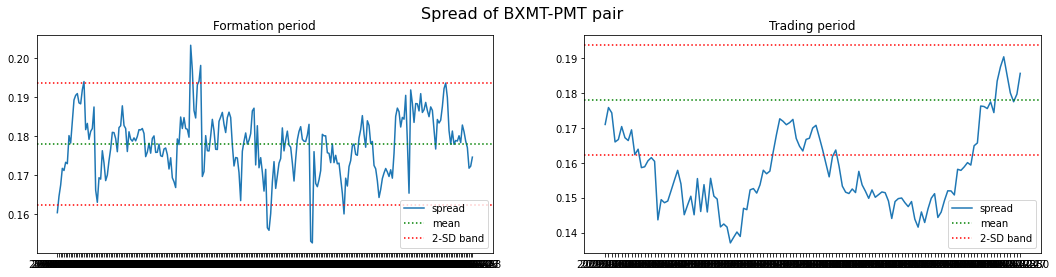

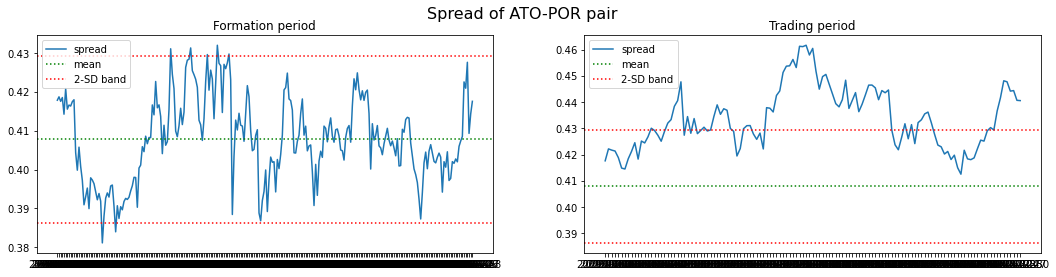

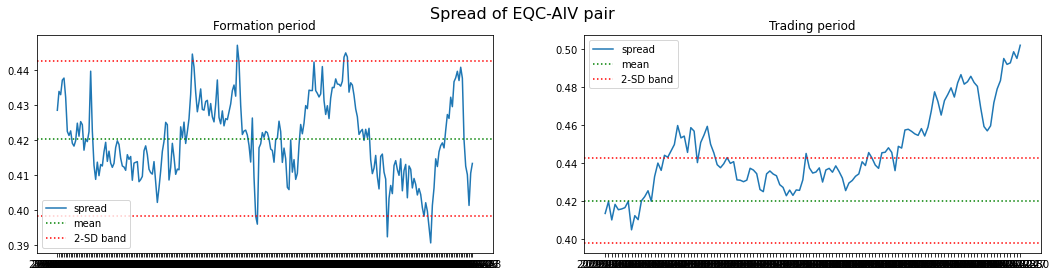

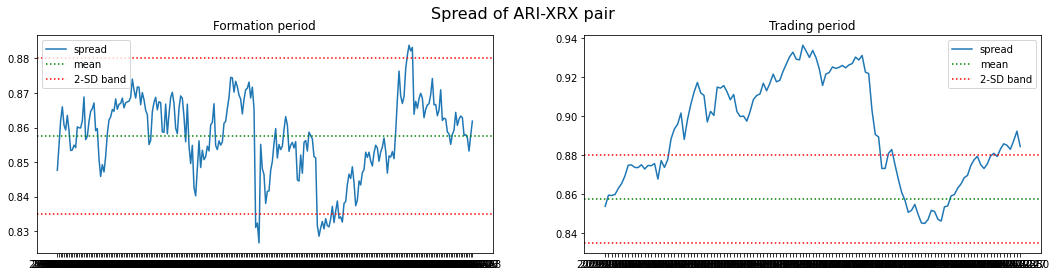

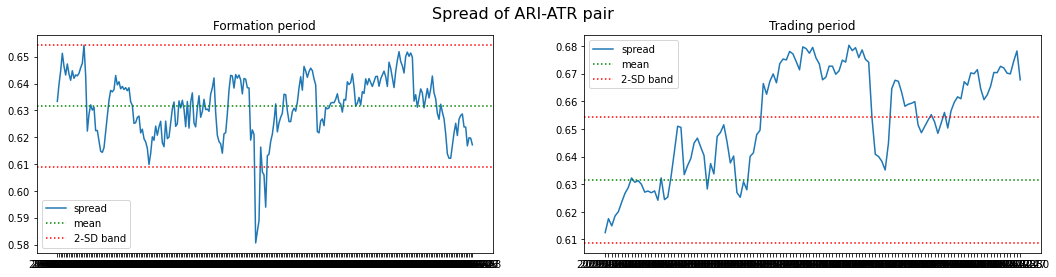

In [72]:
top5_distance = list(pairs12_6.sort_values(by='Distance').index[:5])
plot_pairs(top5_distance, train12_6, test12_6)

In [73]:
calculate_metrics(top5_distance, test12_6, pairs12_6)

,Distance,CADF p-value,ADF p-value,Spread SD,Pearson r,Num zero-crossings,Hurst Exponent,Half-life of mean reversion,% days within historical 2-SD band
BXMT-PMT,0.261499,0.342681,0.159534,0.007819,0.809057,3,0.430313,13.320119,33.070866
ATO-POR,0.320029,0.117557,0.228287,0.010751,0.824829,0,0.403561,7.095617,40.944882
EQC-AIV,0.380087,0.924005,0.801496,0.011122,0.730938,3,0.572766,31.862276,51.968504
ARI-XRX,0.486811,0.303245,0.504561,0.011336,-0.399265,3,0.509989,25.224604,41.732283
ARI-ATR,0.326041,0.365714,0.150985,0.011439,-0.006886,9,0.440912,10.960141,48.818898


## Highest number of zero crossings

In [74]:
pairs12_6.sort_values(by='Num zero-crossings', ascending=False)

,Distance,Num zero-crossings,Pearson r,Spread mean,Spread SD,Hurst Exponent,Half-life of mean reversion,Hedge ratio
PCH-WERN,0.452258,62.0,0.893696,-0.413034,0.028661,0.292854,3.079360,1.381646
SITC-SAGE,1.204807,59.0,0.878829,-1.113600,0.076352,0.311025,3.452021,2.062156
RYN-WERN,0.480547,59.0,0.803218,-0.059439,0.030453,0.426599,6.356487,0.993811
RPAI-ALGT,0.462340,58.0,0.793722,0.574169,0.029300,0.260594,3.263771,0.444950
UBA-ALGT,0.413029,56.0,0.854054,0.509236,0.026175,0.309224,3.396066,0.500143
...,...,...,...,...,...,...,...,...
DLX-EQT,1.307072,12.0,0.823410,0.496852,0.082832,0.400595,17.153326,0.421622
TRMK-GFF,0.360827,12.0,0.886462,0.769277,0.022867,0.397948,7.841209,0.268210
GBCI-CATY,0.401495,12.0,0.587811,0.702527,0.025444,0.473824,10.574117,0.376066
CMA-MDGL,0.471685,12.0,0.856508,0.442142,0.029892,0.395510,15.259674,0.595944


In [75]:
top5_crossings = list(pairs12_6.sort_values(by='Num zero-crossings', ascending=False).index[:5])

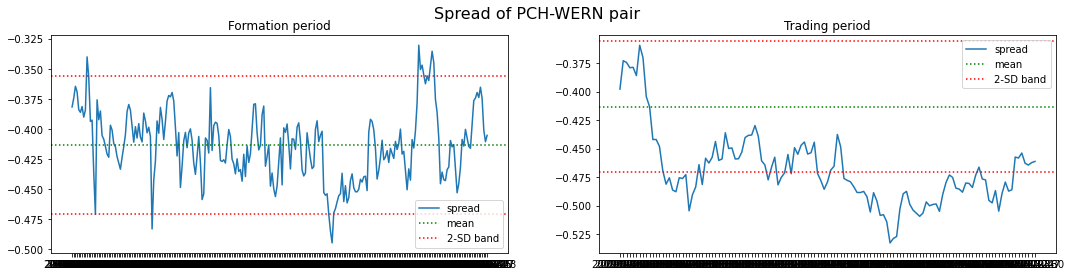

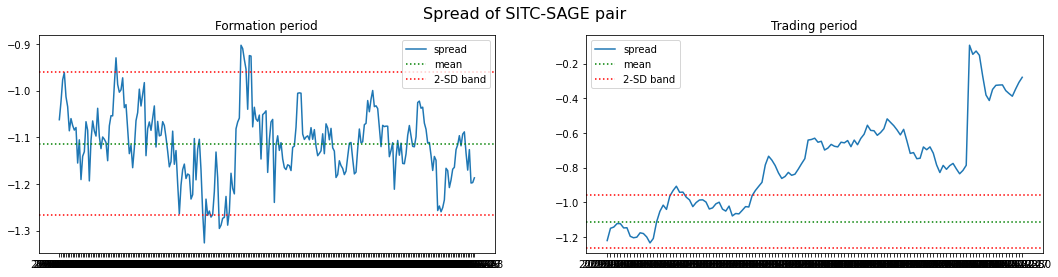

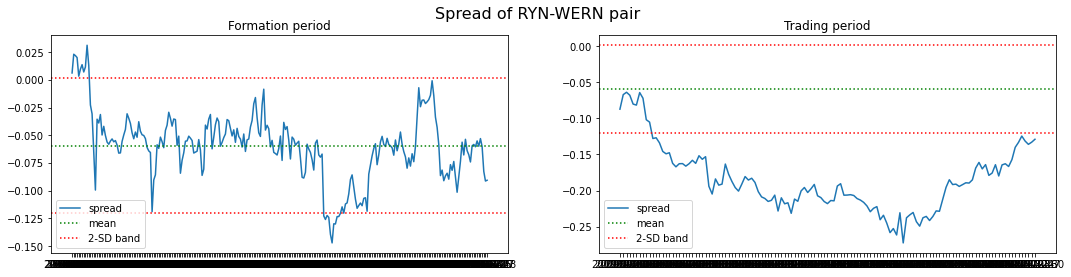

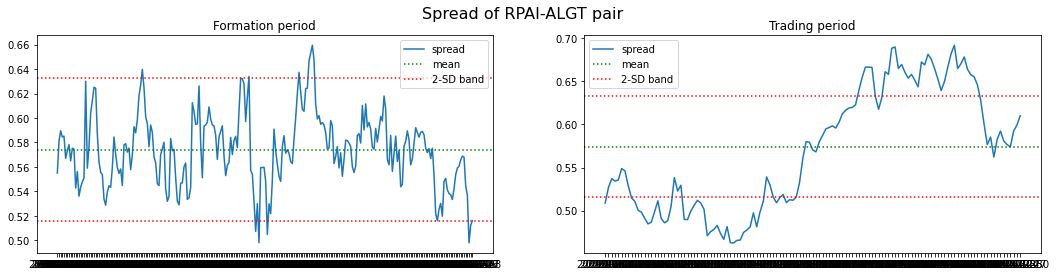

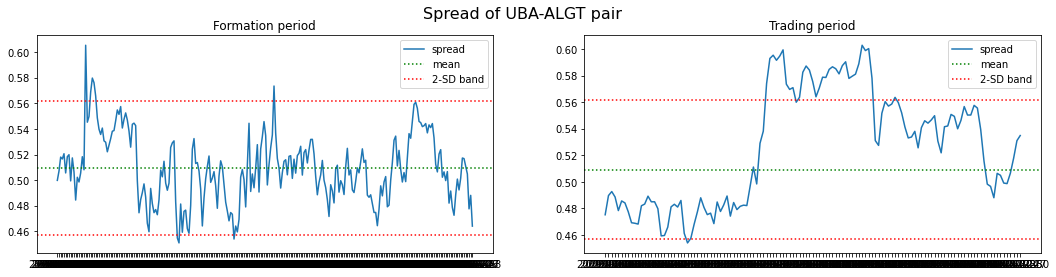

In [76]:
plot_pairs(top5_crossings, train12_6, test12_6)

In [77]:
calculate_metrics(top5_crossings, test12_6, pairs12_6)

,Distance,CADF p-value,ADF p-value,Spread SD,Pearson r,Num zero-crossings,Hurst Exponent,Half-life of mean reversion,% days within historical 2-SD band
PCH-WERN,0.721331,0.16875,0.069714,0.028661,0.89715,1,0.568487,7.697332,44.094488
SITC-SAGE,4.819212,0.618108,0.594288,0.076352,-0.095303,1,0.5733,20.984227,32.283465
RYN-WERN,1.500808,0.841544,0.161046,0.030453,0.5127,0,0.609521,14.277154,7.874016
RPAI-ALGT,0.804362,0.508292,0.7905,0.0293,0.888444,7,0.547832,35.185293,38.582677
UBA-ALGT,0.529564,0.539982,0.350092,0.026175,0.779318,5,0.532681,17.821604,73.228346


## Highest Pearson r

In [78]:
pairs12_6.sort_values(by='Pearson r', ascending=False)

,Distance,Num zero-crossings,Pearson r,Spread mean,Spread SD,Hurst Exponent,Half-life of mean reversion,Hedge ratio
TDS-USM,0.278758,48.0,0.984012,0.299802,0.017666,0.335650,4.191674,0.687840
PACW-HOMB,0.271188,41.0,0.981729,-0.022121,0.017186,0.324258,5.114590,1.016300
BXMT-PMT,0.123387,52.0,0.979720,0.178022,0.007819,0.267642,2.343333,0.839550
AA-NOV,0.425494,52.0,0.979613,0.301968,0.026965,0.396287,4.032034,0.632285
HOMB-TOWN,0.281722,30.0,0.978838,-0.325428,0.017853,0.338511,4.536087,1.349551
...,...,...,...,...,...,...,...,...
UGI-PRI,0.359086,36.0,0.003335,1.027557,0.022756,0.339930,5.833015,0.001574
GBCI-CSL,0.496286,34.0,0.002132,1.061671,0.031451,0.409926,10.691928,0.000616
GBCI-BXMT,0.496287,34.0,0.000856,1.061590,0.031451,0.409823,10.688329,0.000690
UGI-BIG,0.359088,36.0,0.000751,1.029196,0.022756,0.339527,5.827919,0.000088


In [79]:
top5_pearson = list(pairs12_6.sort_values(by='Pearson r', ascending=False).index[:5])

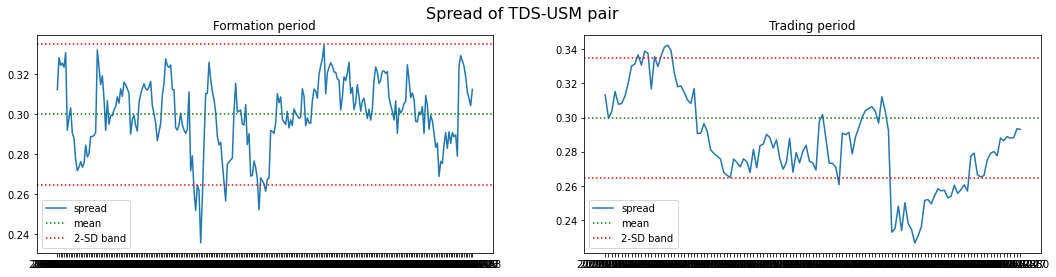

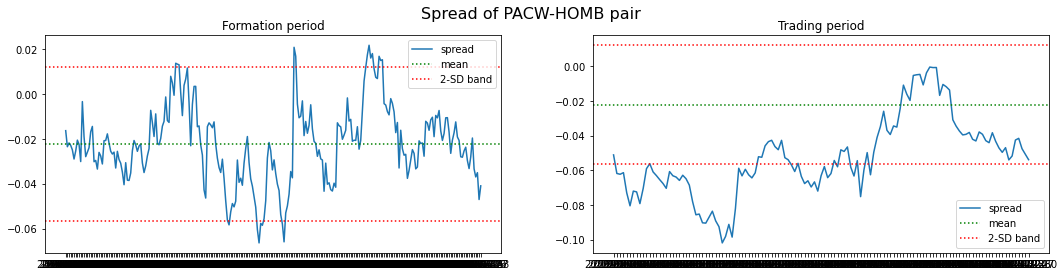

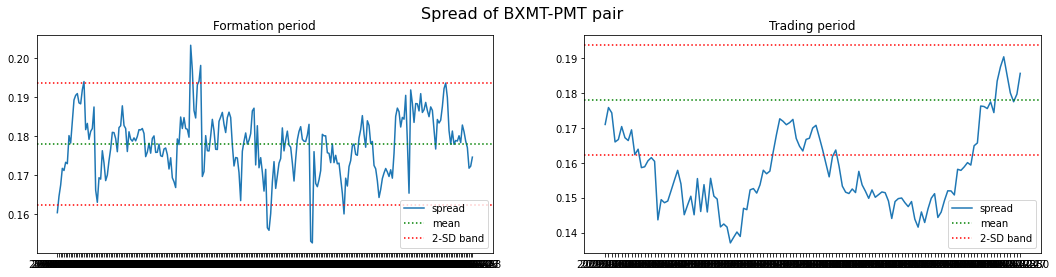

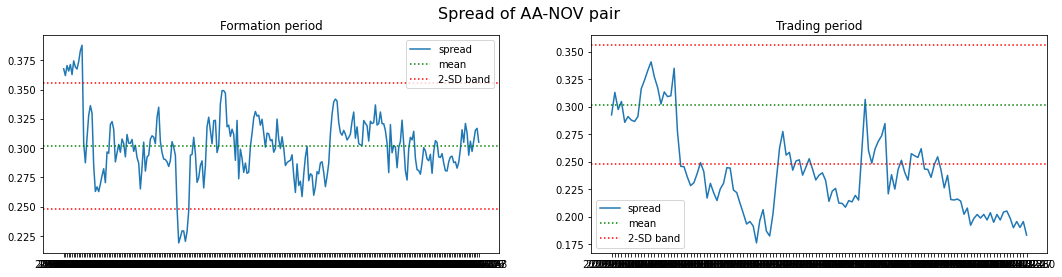

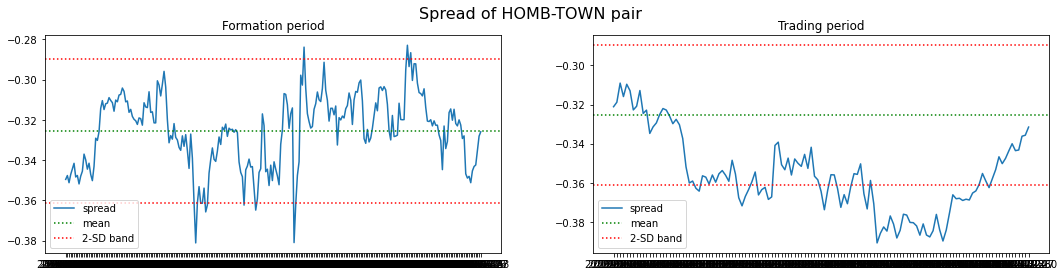

In [80]:
plot_pairs(top5_pearson, train12_6, test12_6)

In [81]:
calculate_metrics(top5_pearson, test12_6, pairs12_6)

,Distance,CADF p-value,ADF p-value,Spread SD,Pearson r,Num zero-crossings,Hurst Exponent,Half-life of mean reversion,% days within historical 2-SD band
TDS-USM,0.344434,0.026776,0.16975,0.017666,0.987352,9,0.492293,8.882104,74.015748
PACW-HOMB,0.426005,0.531204,0.365124,0.017186,0.838157,2,0.481843,14.305091,52.755906
BXMT-PMT,0.261499,0.342681,0.159534,0.007819,0.809057,3,0.430313,13.320119,33.070866
AA-NOV,0.819104,0.381504,0.177823,0.026965,0.628192,8,0.473639,8.459066,33.858268
HOMB-TOWN,0.410127,0.393915,0.219072,0.017853,0.760925,3,0.490381,10.340188,57.480315


## 36 months formation period \ 6 months trading period

In [82]:
# prepare data
cumret36_6 = cumret.loc['2016-07-01':]
cumret36_6 = cumret36_6 / cumret36_6.iloc[0] # divide by first row so that all prices start at 1
train36_6 = cumret36_6.loc['2016-07-01':'2019-06-31'] # formation period
test36_6 = cumret36_6.loc['2019-07-01':'2019-12-31'] # trading period

In [ ]:
pairs36_6 = select_pairs(train36_6)

In [85]:
pairs36_6

,Distance,Num zero-crossings,Pearson r,Spread mean,Spread SD,Hurst Exponent,Half-life of mean reversion,Hedge ratio
IEX-WTRG,2.730618,66.0,0.884017,-0.506094,0.099642,0.484466,17.565892,1.956274
IEX-WRLD,1.694440,50.0,0.957005,0.497293,0.061831,0.370805,15.621250,0.559448
NUAN-CXW,1.858561,42.0,0.590243,0.870551,0.067820,0.395403,17.434368,0.248202
MOH-DECK,3.625462,48.0,0.940827,0.119716,0.132295,0.357488,22.901431,1.009714
PWR-NCLH,1.992233,61.0,0.777443,0.579093,0.072698,0.413033,20.680678,0.666258
...,...,...,...,...,...,...,...,...
KRO-VAC,4.720938,51.0,0.923001,-0.186133,0.172269,0.466469,21.838402,1.779684
ALGT-SBNY,2.059645,74.0,0.764231,0.104947,0.075158,0.346171,15.569417,0.833889
SAGE-WTRG,8.306789,64.0,0.806599,-2.148353,0.303119,0.473166,21.884967,4.294153
SAGE-THG,5.223223,54.0,0.928362,-1.102879,0.190598,0.392825,17.515307,2.592024


## Shortest distance

In [86]:
pairs36_6.sort_values(by='Distance')

,Distance,Num zero-crossings,Pearson r,Spread mean,Spread SD,Hurst Exponent,Half-life of mean reversion,Hedge ratio
OGS-ATO,0.573373,74.0,0.987945,-0.074458,0.020923,0.411639,16.824540,1.098782
POR-NWE,0.619923,59.0,0.969541,0.157402,0.022621,0.392656,18.478290,0.896661
EQC-OHI,0.677947,47.0,0.902124,0.674824,0.024739,0.379738,17.531181,0.368345
EQC-AIV,0.680888,62.0,0.901227,0.388106,0.024846,0.357605,18.080169,0.654015
EQC-OGE,0.684604,73.0,0.900085,0.589980,0.024982,0.393890,15.751919,0.412650
...,...,...,...,...,...,...,...,...
KRO-NCLH,7.477368,46.0,0.792808,-0.835489,0.272853,0.434462,29.718926,2.631570
TROX-SPNT,7.522449,39.0,0.711800,-0.006454,0.274498,0.499901,28.632317,2.126055
TROX-BDN,7.634447,43.0,0.701327,-2.135957,0.278585,0.456667,20.192327,4.311325
SAGE-WTRG,8.306789,64.0,0.806599,-2.148353,0.303119,0.473166,21.884967,4.294153


In [87]:
top5_distance = list(pairs36_6.sort_values(by='Distance').index[:5])

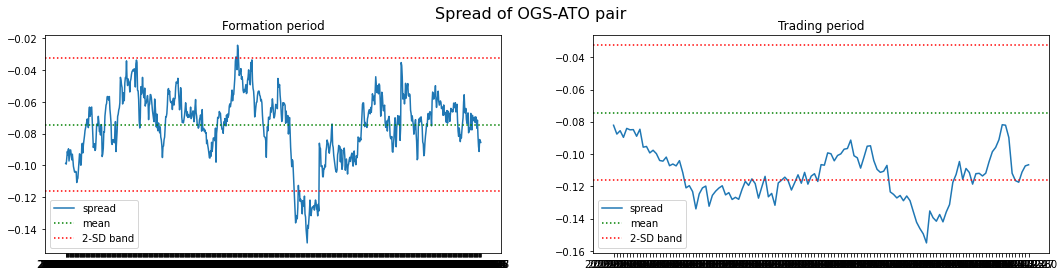

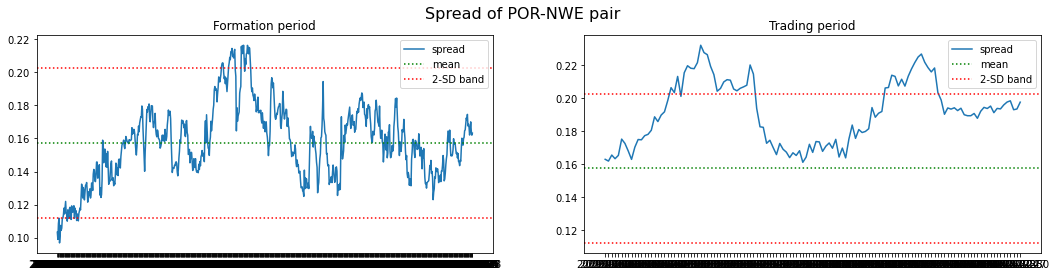

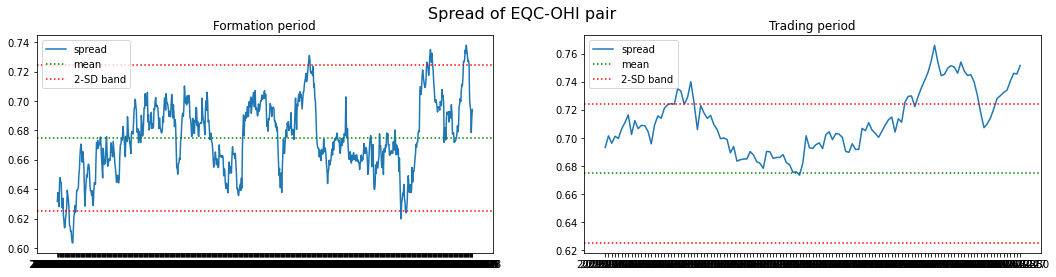

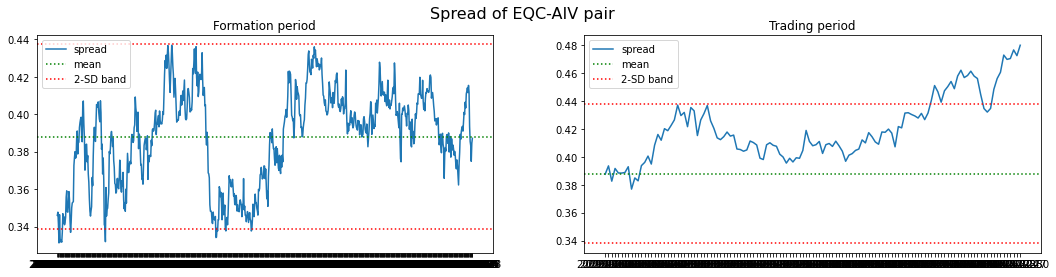

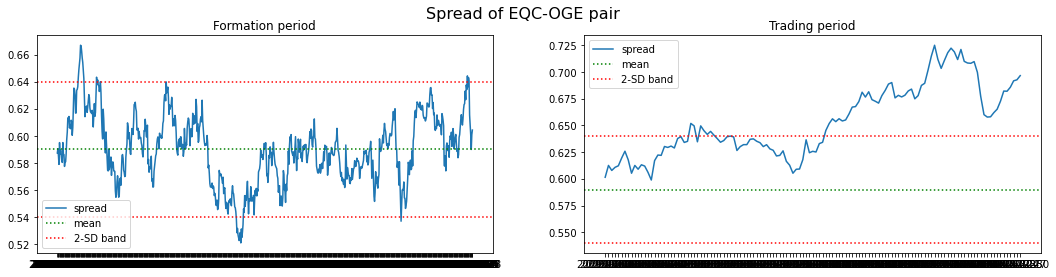

In [88]:
plot_pairs(top5_distance, train36_6, test36_6)

In [89]:
calculate_metrics(top5_distance, test36_6, pairs36_6)

,Distance,CADF p-value,ADF p-value,Spread SD,Pearson r,Num zero-crossings,Hurst Exponent,Half-life of mean reversion,% days within historical 2-SD band
OGS-ATO,0.466733,0.222975,0.068583,0.020923,0.809072,0,0.481455,7.256653,55.905512
POR-NWE,0.441219,0.01538,0.273958,0.022621,0.630875,0,0.461472,12.840838,66.929134
EQC-OHI,0.483559,0.781316,0.569075,0.024739,0.760824,2,0.496281,16.991466,71.653543
EQC-AIV,0.445135,0.924005,0.805177,0.024846,0.730938,5,0.558053,31.502592,80.314961
EQC-OGE,0.808214,0.790169,0.601348,0.024982,0.099559,0,0.623501,26.816062,46.456693


## Highest number of zero crossings

In [90]:
pairs36_6.sort_values(by='Num zero-crossings', ascending=False)

,Distance,Num zero-crossings,Pearson r,Spread mean,Spread SD,Hurst Exponent,Half-life of mean reversion,Hedge ratio
VAC-PCH,2.153015,101.0,0.941013,-0.838849,0.078565,0.323529,9.762199,1.719818
BXS-SHO,1.258887,99.0,0.924576,-0.039128,0.045937,0.310011,10.549316,1.095930
MDU-BRKL,0.788516,99.0,0.877249,0.571172,0.028773,0.281378,8.233573,0.399129
ROIC-APOG,1.259966,99.0,0.645440,0.653168,0.045977,0.393306,17.276432,0.256974
BRO-CVI,1.019123,95.0,0.978097,0.644480,0.037188,0.314274,11.577108,0.387476
...,...,...,...,...,...,...,...,...
IDCC-HOMB,2.010997,36.0,0.694518,0.684746,0.073382,0.431202,21.090263,0.567227
SCL-WWD,1.867157,36.0,0.721578,0.790147,0.068134,0.427121,19.076606,0.439033
CMA-HII,2.848070,36.0,0.896699,-0.169108,0.103928,0.440151,20.924295,1.526436
COLB-ECPG,2.044074,36.0,0.764686,0.924672,0.074589,0.478208,23.029841,0.346765


In [91]:
top5_crossings = list(pairs36_6.sort_values(by='Num zero-crossings', ascending=False).index[:5])

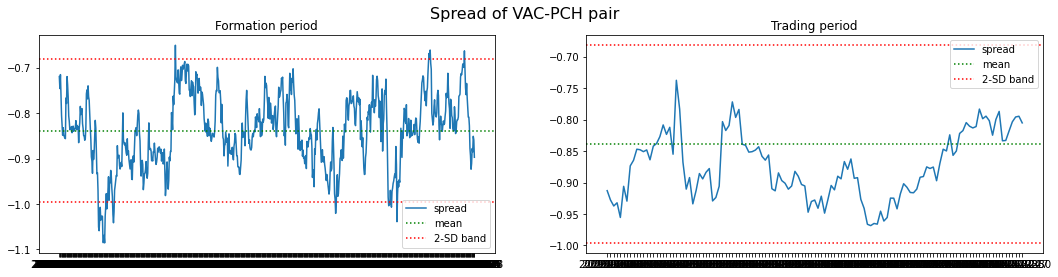

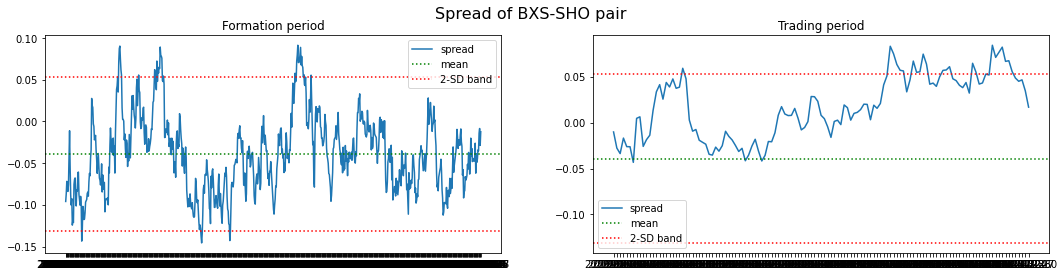

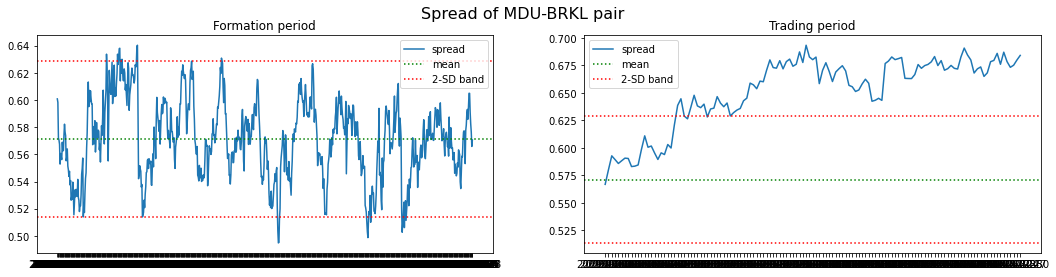

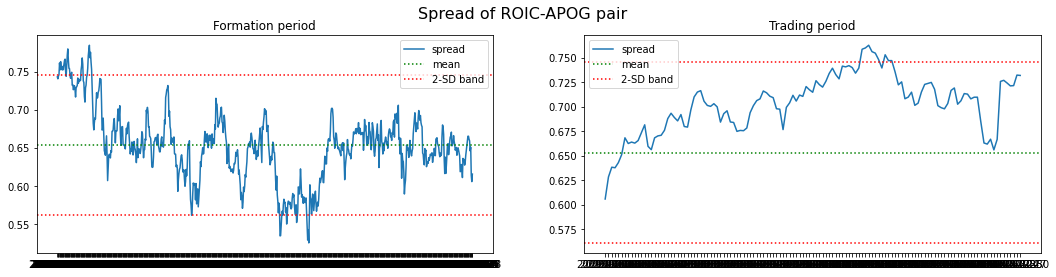

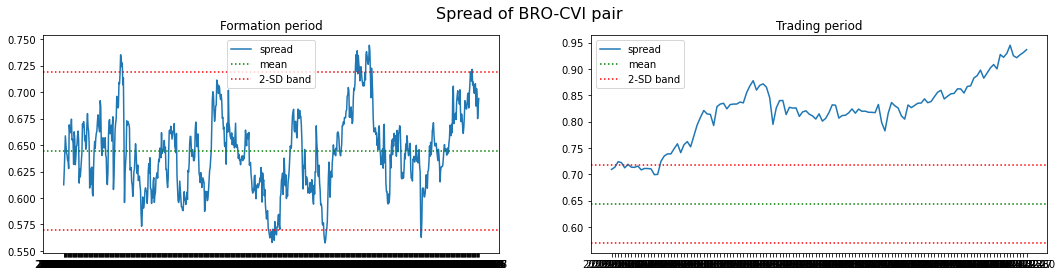

In [92]:
plot_pairs(top5_crossings, train36_6, test36_6)

In [93]:
calculate_metrics(top5_crossings, test36_6, pairs36_6)

,Distance,CADF p-value,ADF p-value,Spread SD,Pearson r,Num zero-crossings,Hurst Exponent,Half-life of mean reversion,% days within historical 2-SD band
VAC-PCH,0.701944,0.214763,0.059741,0.078565,0.901688,9,0.35413,5.653276,100.0
BXS-SHO,0.749636,0.018264,0.169415,0.045937,0.875581,6,0.398711,8.708147,81.102362
MDU-BRKL,0.977958,0.092516,0.095799,0.028773,0.790958,1,0.613059,11.70422,18.897638
ROIC-APOG,0.654669,0.207549,0.041517,0.045977,0.042976,1,0.558398,6.929416,92.913386
BRO-CVI,2.086339,0.835838,0.881626,0.037188,-0.36566,0,0.635295,30.10555,9.448819


## Highest Pearson r

In [94]:
pairs36_6.sort_values(by='Pearson r', ascending=False)

,Distance,Num zero-crossings,Pearson r,Spread mean,Spread SD,Hurst Exponent,Half-life of mean reversion,Hedge ratio
OGS-ATO,0.573373,74.0,0.987945,-0.074458,0.020923,0.411639,16.824540,1.098782
KIM-BRX,0.800004,56.0,0.986957,-0.290323,0.029193,0.399161,11.839873,1.191272
MTG-ESNT,1.104673,94.0,0.979970,0.032455,0.040310,0.357744,14.256815,1.055601
BRO-CVI,1.019123,95.0,0.978097,0.644480,0.037188,0.314274,11.577108,0.387476
HFC-PBF,2.481273,57.0,0.976089,-0.090763,0.090543,0.386047,17.247496,1.320731
...,...,...,...,...,...,...,...,...
TMP-BFS,2.028136,67.0,0.014751,1.263240,0.074008,0.479726,20.675334,0.014135
TMP-RCII,2.028262,73.0,0.009673,1.274464,0.074012,0.479446,20.585408,0.002422
TMP-USM,2.028269,75.0,0.009292,1.271939,0.074013,0.479021,20.623887,0.004858
TMP-FL,2.028305,69.0,0.007151,1.274663,0.074014,0.478973,20.593800,0.002376


In [95]:
top5_pearson = list(pairs36_6.sort_values(by='Pearson r', ascending=False).index[:5])

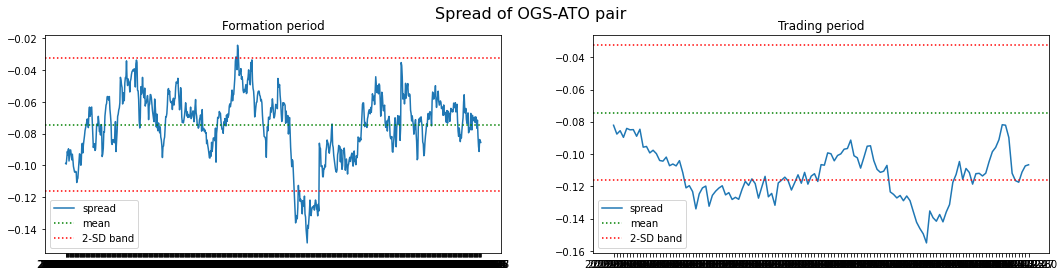

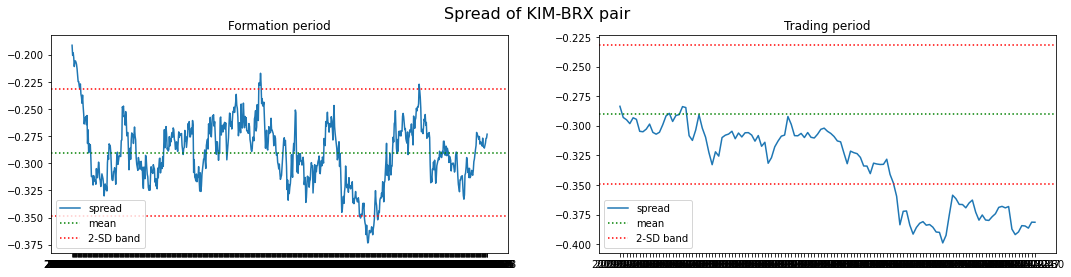

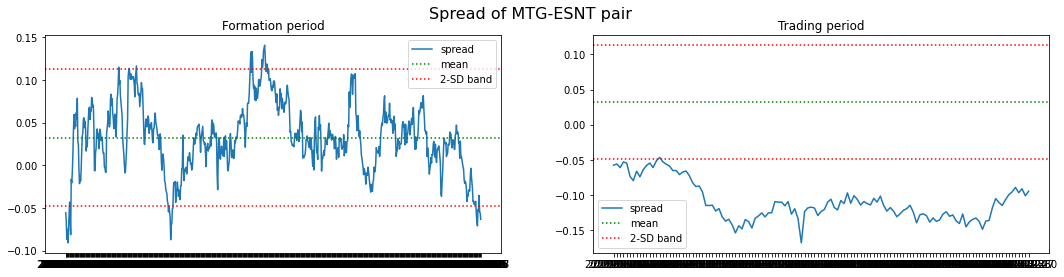

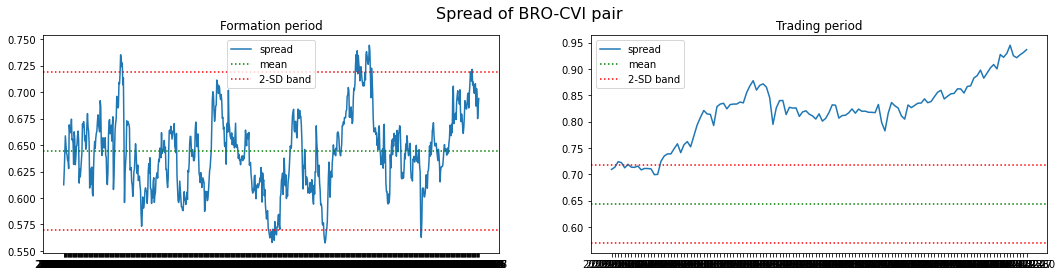

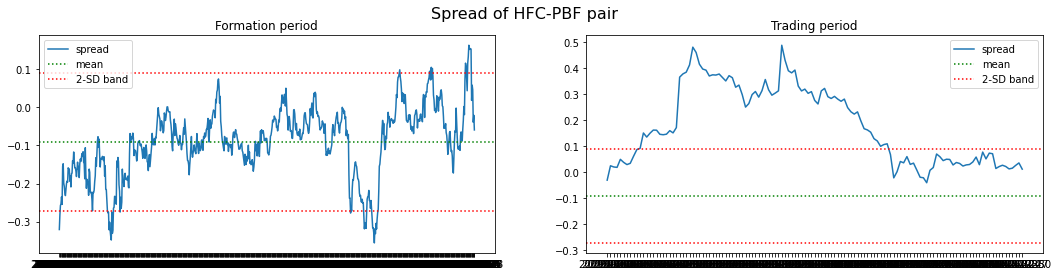

In [96]:
plot_pairs(top5_pearson, train36_6, test36_6)

In [97]:
calculate_metrics(top5_pearson, test36_6, pairs36_6)

,Distance,CADF p-value,ADF p-value,Spread SD,Pearson r,Num zero-crossings,Hurst Exponent,Half-life of mean reversion,% days within historical 2-SD band
OGS-ATO,0.466733,0.222975,0.068583,0.020923,0.809072,0,0.481455,7.256653,55.905512
KIM-BRX,0.621872,0.549536,0.668693,0.029193,0.9706,5,0.583508,30.487118,66.141732
MTG-ESNT,1.629006,0.583281,0.209027,0.04031,0.905006,0,0.512803,9.329682,0.787402
BRO-CVI,2.086339,0.835838,0.881626,0.037188,-0.36566,0,0.635295,30.10555,9.448819
HFC-PBF,3.478599,0.271825,0.54763,0.090543,0.616887,0,0.53262,22.374324,40.15748
